## Task 6 - Prediction using Decision Tree Algorithm



### Submitted by - Shivank Udayawal

###  Decision Tree classifier

### Objective:

* Create the Decision Tree classifier and visualize it graphically.


* The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.

## Importing the Required Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt
import sklearn.datasets as datasets

## Importing the Dataset

In [2]:
iris = datasets.load_iris()

df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [3]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
df.shape

(150, 4)

## Let's check the summary of data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width (cm),150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal length (cm),150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal width (cm),150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


## Missing Value

In [7]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

* As we see, there is no missing value in the dataset

## Data Visualizing

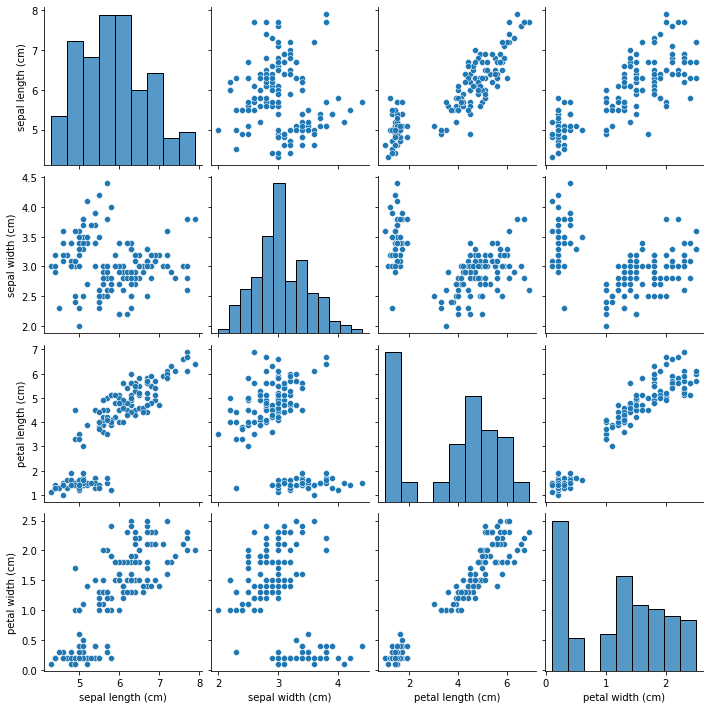

In [8]:
sns.pairplot(df)

In [9]:
X = iris.data
Y = iris.target
Y = Y.astype(int)

In [10]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

scaler.fit(X)

X = scaler.transform(X)

## Splitting dataset into train and test sets

In [11]:
from sklearn.model_selection import train_test_split  
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [12]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((112, 4), (38, 4), (112,), (38,))

## Defining the Decision Tree Algorithm

In [13]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

model.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [14]:
y_pred = model.predict(X_test)

y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0])

In [15]:
cmp = pd.DataFrame({'Actual':Y_test, 'Predicted':y_pred})

cmp.head()

,Actual,Predicted
0,1,1
1,0,0
2,2,2
3,1,1
4,1,1


## Constructing Confusion Matrix

In [16]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

print("confusion matrix :")
print(confusion_matrix(Y_test, y_pred))

print("\n")

print("Accuracy score :")
print(accuracy_score(Y_test, y_pred))

print("\n")

print("Classification Report :")
print(classification_report(Y_test, y_pred))

confusion matrix :
[[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]


Accuracy score :
1.0


Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



In [17]:
print(list(zip(df.columns,model.feature_importances_)))

[('sepal length (cm)', 0.03575133668502114), ('sepal width (cm)', 0.0), ('petal length (cm)', 0.39794323980272234), ('petal width (cm)', 0.5663054235122565)]


## Visualize of the Decision Tree

In [18]:
from sklearn import tree
with open("model_DecisionTree.txt","w") as f:
    f=tree.export_graphviz(model,feature_names = df.columns[:],out_file = f)

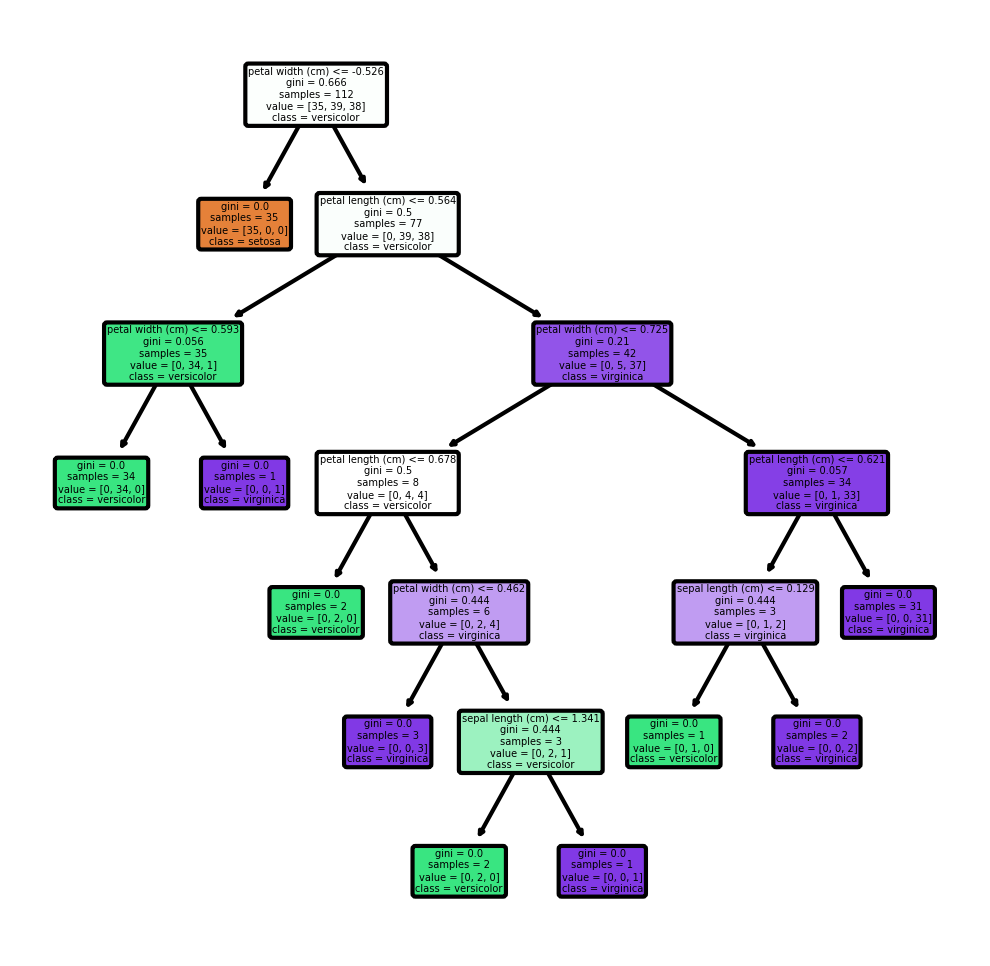

In [19]:
fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa','versicolor','virginica']

fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi = 300)

tree.plot_tree(model, feature_names = fn, class_names = cn, filled = True,rounded=True);